In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../dirty_cafe_sales.csv')


# EDA (Exploratory data analysis)

## 1. Introduction

### Objective of the analysis

The objective of this exploratory data analysis (EDA) is to identify key trends and patterns in the café’s sales. We focus on understanding the factors that influence revenue, such as product popularity, seasonality, and differences in sales across locations and payment methods. The analysis will also serve to uncover potential opportunities to improve operational efficiency and maximize sales.

### Context

The café is located in an environment where consumer behavior can be influenced by seasonal demand, daily and weekly cycles, and customer preferences. There are many cafés and competition is high, it is crucial to understand how to adapt the offer and operational strategies to appeal to a wide range of customers. The emphasis is not only on increasing sales, but also on providing a quality customer experience.

### Data

The analyzed data contains 10,000 café transaction records over a certain period of time. Each record includes the following information:

- Transaction ID: A unique transaction identifier.
- Item: The item the customer purchased (e.g. Coffee, Cake, Smoothie).
- Quantity: The number of units purchased.
- Price Per Unit: The price per unit of the item.
- Total Spent: The total amount spent for the transaction.
- Payment Method: The payment method (e.g. Credit Card, Cash, Digital Wallet).
- Location: The location where the transaction was made (In-store or Takeaway).
- Transaction Date: The date of the transaction.

- The dataset also contains invalid values ​​(e.g. ERROR or UNKNOWN) and missing information that must be processed before deeper analysis can be performed. These steps will help ensure that the results are accurate and interpretable.

## 2. Importing data and first look at the dataset

In [60]:
df.head(10)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5,4.0,20.0,Credit Card,NaN,2023-03-31
6,TXN_4433211,UNKNOWN,3,3.0,9.0,ERROR,Takeaway,2023-10-06
7,TXN_6699534,Sandwich,4,4.0,16.0,Cash,UNKNOWN,2023-10-28
8,TXN_4717867,NaN,5,3.0,15.0,NaN,Takeaway,2023-07-28
9,TXN_2064365,Sandwich,5,4.0,20.0,NaN,In-store,2023-12-31


### Desctibtion of dataset

- shape

In [61]:
df.shape

(10000, 8)

- missing values

In [62]:
df.isnull().sum()

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

-  data types

In [63]:
df.dtypes

Transaction ID      object
Item                object
Quantity            object
Price Per Unit      object
Total Spent         object
Payment Method      object
Location            object
Transaction Date    object
dtype: object

In [64]:
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')
df['Total Spent'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')
df.dtypes

Transaction ID              object
Item                        object
Quantity                   float64
Price Per Unit             float64
Total Spent                float64
Payment Method              object
Location                    object
Transaction Date    datetime64[ns]
dtype: object

### Data quality

- duplicities

In [65]:
dupliticies = df.duplicated().sum()
print('The number of duplicieies is', dupliticies)

The number of duplicieies is 0


- missing or invali values

In [75]:
invalid_spent = df[df['Total Spent'] != df['Quantity'] * df['Price Per Unit']]
negative_values = df[(df['Total Spent']<0) | (df['Quantity']<0) | (df['Price Per Unit']<0)]

In [73]:
print(invalid_spent)

     Transaction ID      Item  Quantity  Price Per Unit  Total Spent  \
0       TXN_1961373    Coffee       2.0             2.0          2.0   
1       TXN_4977031      Cake       4.0             3.0          4.0   
3       TXN_7034554     Salad       2.0             5.0          2.0   
4       TXN_3160411    Coffee       2.0             2.0          2.0   
5       TXN_2602893  Smoothie       5.0             4.0          5.0   
...             ...       ...       ...             ...          ...   
9995    TXN_7672686    Coffee       2.0             2.0          2.0   
9996    TXN_9659401       NaN       3.0             NaN          3.0   
9997    TXN_5255387    Coffee       4.0             2.0          4.0   
9998    TXN_7695629    Cookie       3.0             NaN          3.0   
9999    TXN_6170729  Sandwich       3.0             4.0          3.0   

      Payment Method  Location Transaction Date  
0        Credit Card  Takeaway       2023-09-08  
1               Cash  In-store     

In [74]:
print(negative_values)

Empty DataFrame
Columns: [Transaction ID, Item, Quantity, Price Per Unit, Total Spent, Payment Method, Location, Transaction Date]
Index: []


### Revenue Distribution

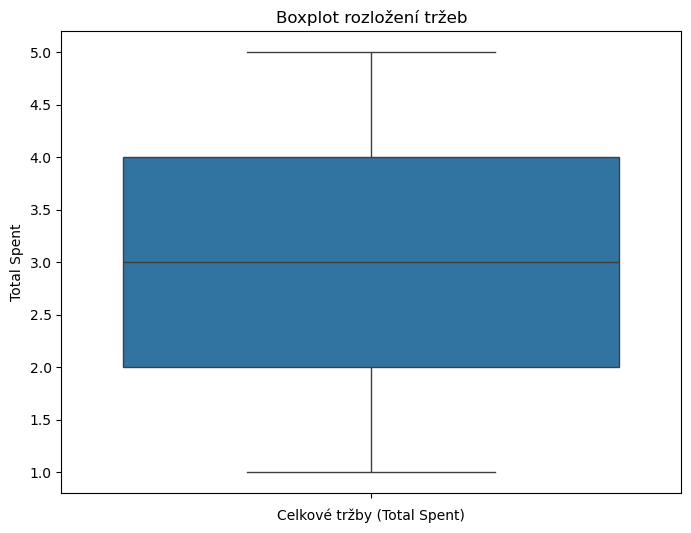

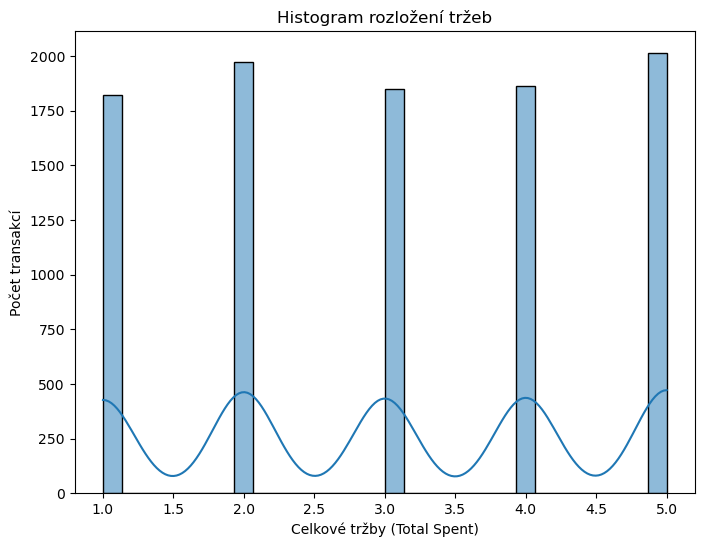

In [67]:
plt.figure(figsize=(8, 6))
sns.boxplot(df['Total Spent'])
plt.title('Boxplot rozložení tržeb')
plt.xlabel('Celkové tržby (Total Spent)')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df['Total Spent'], bins=30, kde=True)
plt.title('Histogram rozložení tržeb')
plt.xlabel('Celkové tržby (Total Spent)')
plt.ylabel('Počet transakcí')
plt.show()
